# Parking violations in New York City-2


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import datetime
from IPython.display import Image
from sqlalchemy import create_engine
import sqlite3
import csv
import time
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline

# Parking tickets in New York City

About this Dataset

Updated                 December 21, 2017
Data Last Updated       August 9, 2017
Metadata Last Updated   December 21, 2017
Date Created            August 3, 2017

Data Provided by        Department of Finance (DOF)
Dataset Owner           NYC OpenData
    
Rows       10.8M
Columns    43

Columns in this Dataset        
Column Name	                 Type
Summons Number	             Number
Plate ID	                 Plain Text
Registration State	         Plain Text
Plate Type	                 Plain Text
Issue Date	                 Date & Time
Violation Code	             Number
............................	
Street Name	                 Plain Text
Intersecting Street	         Plain Text
............................
Hydrant Violation	         Plain Text
Double Parking Violation	 Plain Text


website for data:  https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2017/2bnn-yakx


In [3]:
file='E:\\DS18\\datacamp\\NYC\\ParkingViolations2017.csv'

In [4]:
print(pd.read_csv(file, nrows=5))

   Summons Number Plate ID Registration State Plate Type  Issue Date  \
0      5092469481  GZH7067                 NY        PAS  07/10/2016   
1      5092451658  GZH7067                 NY        PAS  07/08/2016   
2      4006265037  FZX9232                 NY        PAS  08/23/2016   
3      8478629828  66623ME                 NY        COM  06/14/2017   
4      7868300310  37033JV                 NY        COM  11/21/2016   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0               7              SUBN        TOYOT              V             0   
1               7              SUBN        TOYOT              V             0   
2               5              SUBN         FORD              V             0   
3              47              REFG        MITSU              T         10610   
4              69              DELV        INTER              T         10510   

            ...             Vehicle Color  Unregistered Vehicle?  \
0           

In [5]:
connex = sqlite3.connect("Parking2017-1.db")  # Opens file if exists, else creates file
cur = connex.cursor()  # This object lets us actually send messages to our DB and receive results

In [6]:
start = time.time()
sql = "SELECT SummonsNumber,RegistrationState,IssueDate, ViolationTime, StreetName FROM 'table' ;"
df = pd.read_sql_query(sql, connex)

print(df.head(10))
print(df.info())

end = time.time()
elapsed = end - start
print(elapsed)

   SummonsNumber RegistrationState   IssueDate ViolationTime  \
0     5092469481                NY  07/10/2016         0143A   
1     5092451658                NY  07/08/2016         0400P   
2     4006265037                NY  08/23/2016         0233P   
3     8478629828                NY  06/14/2017         1120A   
4     7868300310                NY  11/21/2016         0555P   
5     5096917368                NY  06/13/2017         0852P   
6     1413609545                NJ  08/03/2016         0215A   
7     4628525523                MA  12/21/2016         0758A   
8     4627113330                NY  11/21/2016         1005A   
9     4006478550                VA  10/05/2016         0845A   

             StreetName  
0  ALLERTON AVE (W/B) @  
1  ALLERTON AVE (W/B) @  
2  SB WEBSTER AVE @ E 1  
3               7th Ave  
4               6th Ave  
5   NORTHERN BLVD (E/B)  
6              KINGSTON  
7  EB E GUN HILL RD @ B  
8  NB BAISLEY BLVD @ 15  
9  SB WEBSTER AVE @ E 2  
<class 'p

In [7]:

new=df[df['StreetName'].notnull()]
new=new[new['ViolationTime'].notnull()]
new=new[new['IssueDate'].notnull()]
new=new[new['RegistrationState'].notnull()]
new=new[new['SummonsNumber'].notnull()]
print(new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799018 entries, 0 to 10803027
Data columns (total 5 columns):
SummonsNumber        int64
RegistrationState    object
IssueDate            object
ViolationTime        object
StreetName           object
dtypes: int64(1), object(4)
memory usage: 494.3+ MB
None


NY 8478333
NJ 925680
PA 285318
FL 144493
CT 141041
MA 85502
IN 80732
VA 72600
MD 61778
NC 55777


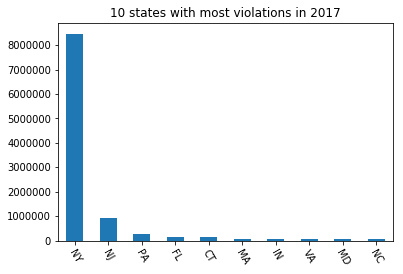

In [8]:
rank_st = new['RegistrationState'].value_counts()
rank_st.sort_values(ascending=False)
top10 = rank_st[:10]
top10.plot(kind="bar", title="10 states with most violations in 2017",rot=-60)

top10_list = top10.index
for idx in top10_list:
    print(str(idx),top10[idx])


From the figure above, it is shown that most tickets issued are cars from local New York. The second most is from New Jersey which is 3 times more than the third state-Pennsylvania. This is very insightful for police in New York City to take measures to reduce the traffic inflow from New Jersey such as imposing higher fees for toll roads leading to New York City.  

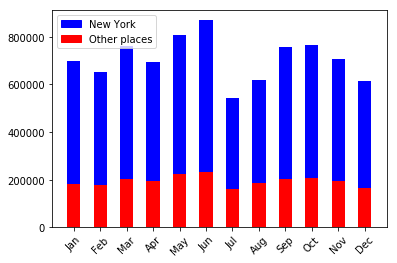

In [31]:
import matplotlib.patches as mpatches

new['month'] = pd.to_datetime(new['IssueDate'],format='%m/%d/%Y').dt.month
top1=new.loc[new['RegistrationState']=='NY']
#print(new.head())
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
num_NY=top1.groupby(['month'])['month'].count()

top_other=new.loc[new['RegistrationState']!='NY']
num_other=top_other.groupby(['month'])['month'].count()

plt.bar(num_NY.index , num_NY, color = 'b', width = 0.5) # plotting the graph
plt.bar(num_other.index , num_other, color = 'r', width = 0.5) # plotting the graph
plt.xticks(num_NY.index, labels, rotation=45) #providing xticks to the graph

blue_patch=mpatches.Patch(color='b',label='New York') 
red_patch=mpatches.Patch(color='r',label='Other places')
plt.legend(handles=[blue_patch,red_patch]) #providing the labels



Above figure indicates that tickets for 12 months have similar pattern for New York city as the other places, i.e., June is the highest month and July is least month. For each month, tickets for New York city drivers are more than those for other cities combined. 